In [1]:
%load_ext autoreload
%autoreload 2

from xaj import odeint
from jax import numpy as np

In [2]:
def rhs(x, y):
    return np.array([y[1], -y[0]])

def run(x, y):
    return (x < 4) & (y[0] < 2.5)

x0 = 0
y0 = np.array([[0,0,0,0], [1,2,3,4]]).T

In [3]:
ns = odeint(rhs, x0, y0, 1, eqax=[1], atol=1e-3, rtol=0, filter=run)

/Users/ckc/Library/Python/3.9/lib/python/site-packages/jax/experimental/maps.py:517: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


In [4]:
x  = np.linspace(-5, 5, num=101)
yn = ns(x)[:,:,0]
ya = np.sin(x)

jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>]
jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=0/1)>, Trac

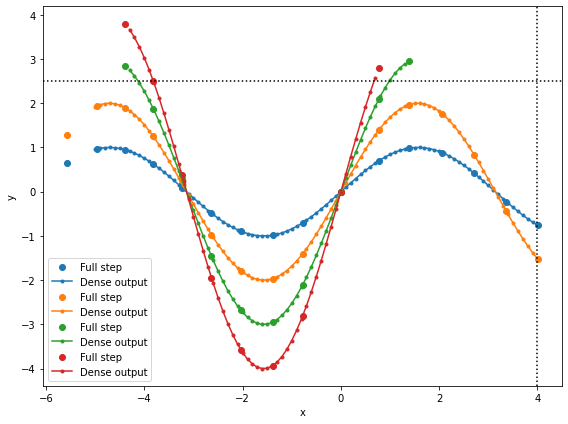

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,6), sharex=True)

ax.scatter(ns.xs, ns.ys[:,0,0], color='C0', label='Full step')
ax.plot(x, yn[:,0], '.-',       color='C0', label='Dense output')

ax.scatter(ns.xs, ns.ys[:,1,0], color='C1', label='Full step')
ax.plot(x, yn[:,1], '.-',       color='C1', label='Dense output')

ax.scatter(ns.xs, ns.ys[:,2,0], color='C2', label='Full step')
ax.plot(x, yn[:,2], '.-',       color='C2', label='Dense output')

ax.scatter(ns.xs, ns.ys[:,3,0], color='C3', label='Full step')
ax.plot(x, yn[:,3], '.-',       color='C3', label='Dense output')

ax.axvline(x=4,   ls=':', color='k')
ax.axhline(y=2.5, ls=':', color='k')
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')

fig.tight_layout()